In [30]:
# Author: Ernesto Rodríguez
# github.com/ernestorodg

###############################################################################
## Analyse UNSW-NB15 dataset for intrusion detection using SVM
###############################################################################

In [31]:
import pandas as pd
import numpy as np
import sys

###############################################################################
## Define constants 
###############################################################################


# Random state for reproducibility
STATE = 0
np.random.seed(10)
# List of available attacks on the dataset
ATTACKS = ['Exploits',
          'Generic',
          ' Fuzzers',
          'DoS',
          'Analysis',
          'Worms',
          'Reconnaissance',
          'Backdoors',
          'Shellcode']

# Especific to the repository 
UNSW_NB15_DIRECTORY = r'../datasets/unsw-nb15/UNSW-NB15 - CSV Files/'
UNSW_NB15_FIRST = 'UNSW-NB15_1.csv'

# Only UNSW_NB15_FIRST is being used on this model

# UNSW_NB15_SECOND = 'UNSW-NB15_2.csv'
# UNSW_NB15_THIRD = 'UNSW-NB15_3.csv'
# UNSW_NB15_FOURTH = 'UNSW-NB15_4.csv'

In [32]:
###############################################################################
## Load dataset
###############################################################################
df = pd.read_csv (UNSW_NB15_DIRECTORY + UNSW_NB15_FIRST)

# Fraction dataframe for quicker testing (copying code is hard)
df = df.sample (frac = 0.1, replace = True, random_state = 0)

columns_label = np.array([ 'srcip','sport','dstip',
                          'dsport','proto','state',
                          'dur','sbytes','dbytes',
                          'sttl','dttl','sloss',
                          'dloss','service','Sload',
                          'Dload','Spkts','Dpkts',
                          'swin','dwin','stcpb',
                          'dtcpb','smeansz','dmeansz',
                          'trans_depth','res_bdy_len','Sjit',
                          'Djit','Stime','Ltime',
                          'Sintpkt','Dintpkt','tcprtt',
                          'synack','ackdat','is_sm_ips_ports',
                          'ct_state_ttl','ct_flw_http_mthd','is_ftp_login',
                          'ct_ftp_cmd','ct_srv_src','ct_srv_dst',
                          'ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm',
                          'ct_dst_sport_ltm','ct_dst_src_ltm','attack_cat',
                          'Label'])

## Add the columns label to our dataset
df.columns = columns_label

## Counting number of null data
nanColumns = [i for i in df.columns if df [i].isnull ().any ()]

## Remove NaN and inf values
df.replace ('Infinity', np.nan, inplace = True) ## Or other text values
df.replace (np.inf, np.nan, inplace = True) ## Remove infinity
df.replace (np.nan, 0, inplace = True)

## Remove error values, especific from the dataset
df.replace ('0xc0a8', 0, inplace = True)
df.replace ('0x20205321', 0, inplace = True)

## For binary comparison: Attack or not Attack
for attack in ATTACKS:
    df['attack_cat'] = df ['attack_cat'].replace(attack, 1) 

# In this case we drop the last column. 'attack_cat' will be our target
df.drop(['Label'], axis=1)


# Propose: Having the same amount of attacks and not-attacks rows
# if (df.attack_cat.value_counts()[1] < df.attack_cat.value_counts()[0]):
#   remove_n =  df.attack_cat.value_counts()[0] - df.attack_cat.value_counts()[1]  # Number of rows to be removed   
#   print(remove_n)
#   df_to_be_dropped = df[df.attack_cat == 0]
#   drop_indices = np.random.choice(df_to_be_dropped.index, remove_n, replace=False)
#   df = df.drop(drop_indices)
# else: 
#   remove_n =  df.attack_cat.value_counts()[1] - df.attack_cat.value_counts()[0]  # Number of rows to be removed   
#   print(remove_n)
#   df_to_be_dropped = df[df.attack_cat == 1]
#   drop_indices = np.random.choice(df_to_be_dropped.index, remove_n, replace=False)
#   df = df.drop(drop_indices)





/home/neto/.virtualenvs/machineLearning-FGQPwM96/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
305711,59.166.0.6,53661,149.171.126.6,22,tcp,FIN,0.555842,3728,5474,31,...,0,0,1,2,3,2,1,1,1,0
435829,59.166.0.8,59581,149.171.126.2,1193,tcp,FIN,0.035930,3926,56022,31,...,0,0,23,29,25,23,4,4,11,0
117952,59.166.0.9,50136,149.171.126.0,53,udp,CON,0.001029,130,162,31,...,0,0,3,4,2,8,2,1,2,0
152315,175.45.176.1,47439,149.171.126.18,53,udp,INT,0.000010,114,0,254,...,0,0,4,4,5,4,4,4,4,1
359783,59.166.0.5,24493,149.171.126.9,80,tcp,FIN,1.152896,1580,10168,31,...,0,0,2,1,4,3,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625292,59.166.0.0,50188,149.171.126.4,56521,tcp,FIN,0.013584,2438,18678,31,...,0,0,3,3,2,2,1,1,1,0
557525,59.166.0.0,58605,149.171.126.3,53,udp,CON,0.003336,146,178,31,...,0,0,4,1,2,14,2,1,2,0
261348,59.166.0.1,30247,149.171.126.8,57704,tcp,FIN,0.141347,320,1896,31,...,0,0,1,1,1,1,1,1,1,0
243391,59.166.0.8,43711,149.171.126.4,22,tcp,FIN,0.008896,3728,5474,31,...,0,0,1,1,1,1,1,1,1,0


In [33]:
###############################################################################
## Slice the dataframe (usually the last column is the target)
###############################################################################

X = pd.DataFrame(df.iloc [:, 0:8])

# Selecting other columns
# X = pd.concat([X, df.iloc[:, 2]], axis=1)

y = df.iloc [:, -1]
print('Number of not-attacks: ', y.value_counts()[0])
print('Number of attacks: ', y.value_counts()[1])

# See Output, only available on jupyter-notebooks
# X

Number of not-attacks:  67751
Number of attacks:  2249


,srcip,sport,dstip,dsport,proto,state,dur,sbytes
305711,59.166.0.6,53661,149.171.126.6,22,tcp,FIN,0.555842,3728
435829,59.166.0.8,59581,149.171.126.2,1193,tcp,FIN,0.035930,3926
117952,59.166.0.9,50136,149.171.126.0,53,udp,CON,0.001029,130
152315,175.45.176.1,47439,149.171.126.18,53,udp,INT,0.000010,114
359783,59.166.0.5,24493,149.171.126.9,80,tcp,FIN,1.152896,1580
...,...,...,...,...,...,...,...,...
625292,59.166.0.0,50188,149.171.126.4,56521,tcp,FIN,0.013584,2438
557525,59.166.0.0,58605,149.171.126.3,53,udp,CON,0.003336,146
261348,59.166.0.1,30247,149.171.126.8,57704,tcp,FIN,0.141347,320
243391,59.166.0.8,43711,149.171.126.4,22,tcp,FIN,0.008896,3728


In [34]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


####################################################################
# Treat categorical data 
####################################################################

cat_cols = X.columns[X.dtypes == 'O'] # Returns array with the columns that has Object types elements

categories = [
    X[column].unique() for column in X[cat_cols]]


for cat in categories:
    cat[cat == None] = 'missing'  # noqa


# Replacing missing values
categorical_imputer = SimpleImputer(missing_values=None, 
                                    strategy='constant', 
                                    fill_value='missing')

X[cat_cols] = categorical_imputer.fit_transform(X[cat_cols])

# Encoding the categorical data
categorical_encoder = OrdinalEncoder(categories = categories)

X[cat_cols] = categorical_encoder.fit_transform(X[cat_cols])

# Scaling new numerical values

numerical_imputer = SimpleImputer(strategy = "mean")
X[cat_cols] = numerical_imputer.fit_transform(X[cat_cols])

numerical_scaler = StandardScaler()
X[cat_cols] = numerical_scaler.fit_transform(X[cat_cols])



In [35]:
####################################################################
# Treat numerical data 
####################################################################

num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')] # Returns array with the columns that has float types elements

# Scaling numerical values

numerical_imputer = SimpleImputer(strategy = "mean")
X[num_cols] = numerical_imputer.fit_transform(X[num_cols])

numerical_scaler = StandardScaler()
X[num_cols] = numerical_scaler.fit_transform(X[num_cols])


In [36]:
# Transform the data to numpy arrays
X = X.values
y = y.values

In [37]:
###############################################################################
## Split dataset into train and test sets if not using cross validation
###############################################################################
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 1/5,
                                                     random_state = STATE)

In [38]:
####################################################################
# Find best parameters and plot graphs 
####################################################################

# from sklearn.model_selection import validation_curve
# from matplotlib import pyplot as plt
# import time

# # Measure time of training
# start_time = time.time()

# # For C param
# param_range = np.linspace(0.1, 1000, 10)

# # For gamma param
# # param_range = np.logspace(-6, -1, 5)

# train_scores, test_scores = validation_curve(
#     SVC(), X, y, param_name="C", param_range=param_range,
#     scoring="precision", n_jobs=1)

# print("--- %s seconds ---" % (time.time() - start_time))

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# plt.title("Validation Curve with SVM")
# plt.xlabel(r"$\gamma$")
# plt.ylabel("Score")
# plt.ylim(0.0, 1.1)
# lw = 2
# plt.semilogx(param_range, train_scores_mean, label="Training score",
#              color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=lw)
# plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
#              color="navy", lw=lw)
# plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2,
#                  color="navy", lw=lw)
# plt.legend(loc="best")
# plt.show()

# Best gamma found for 0.1 x Dataset: 10^(-3)

In [39]:
###############################################################################
## Train the model using learning curve, using cross-validation
###############################################################################

import time
from sklearn.model_selection import learning_curve

# Measure time of training
start_time = time.time()

# Training the model with cross validation approach
train_sizes, train_scores, valid_scores = learning_curve(
                                            SVC(kernel="rbf", random_state=0, gamma=1, C=1), 
                                            X_train, 
                                            y_train, 
                                            cv=5,
                                            scoring='f1')
print("--- %s seconds ---" % (time.time() - start_time))




--- 113.70535969734192 seconds ---


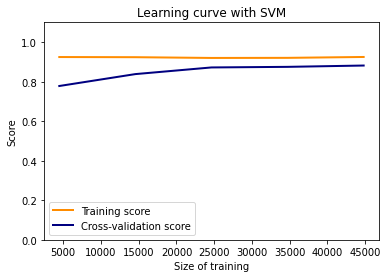

In [40]:
###############################################################################
## Plotting learning curve
###############################################################################
from matplotlib import pyplot as plt

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Learning curve with SVM")
plt.xlabel("Size of training")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(train_sizes, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)

plt.plot(train_sizes, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)

plt.legend(loc="best")
plt.show()


In [41]:
###############################################################################
## Training the model without cross-validation (simpler than the training above)
###############################################################################

# Assign the model to be used
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Measure time of this training
start_time = time.time()

# Training the model
model = svc.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 14.775124788284302 seconds ---


In [42]:
###############################################################################
## Obtain metrics from the trained model without cross-validation
###############################################################################

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import multilabel_confusion_matrix


# Predicting from the test slice
y_pred = model.predict(X_test)

# Precision == TP / (TP + FP)
print('Precision Score: ', precision_score(y_test, y_pred))

# Recall == TP / (TP + FN)
print('Recall Score: ', recall_score(y_test, y_pred))

# Accuracy 
print('Accuracy: \n', model.score(X_test, y_test))

# Multilabel Confusion Matrix: 
# [tn fp]
# [fn tp]
print(multilabel_confusion_matrix(y_test, y_pred, labels=[0, 1]))

Precision Score:  0.8868778280542986
Recall Score:  0.8634361233480177
Accuracy: 
 0.992
[[[  392    62]
  [   50 13496]]

 [[13496    50]
  [   62   392]]]


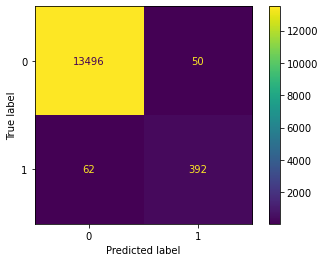

In [43]:
###############################################################################
## Plotting confusion matrix
###############################################################################
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(model, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
